## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.read_csv('D:/Python/Walmart_FB_2014_2017.csv', index_col='Date')

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.22304898, 0.77695102])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [3]:
np.sum(weights * log_returns.mean()) * 250

0.22411805249756017

Expected Portfolio Variance:

In [4]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.05458540424100332

Expected Portfolio Volatility:

In [5]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.23363519478238573

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pf_returns, pf_volatilities

([0.011064480111127595,
  0.161296587780175,
  0.178272226279666,
  0.23920787486716485,
  0.06532827154646964,
  0.1475953294289723,
  0.10700835855928134,
  0.11919936871034953,
  0.0988159763293867,
  0.11024688381197345,
  0.26615264851365683,
  0.2324713110640678,
  0.06240815530249236,
  0.033392434949833516,
  0.034886619148751664,
  0.24219165352730795,
  0.17133729470082135,
  0.1608664218925143,
  0.15108442954589854,
  0.14649911512841518,
  0.14549481738012113,
  0.1650758840157625,
  0.12403569019368553,
  0.18177373144799258,
  0.06299552880380876,
  0.016245113479626806,
  0.15949992386821638,
  0.02925799974847895,
  0.12066256242345381,
  0.16525471081077264,
  0.14306062739231423,
  0.09252576035494318,
  0.23441109858507586,
  0.11321379608451668,
  0.008682647318846128,
  0.19499141961396163,
  0.0583109929718726,
  0.21419409817798632,
  0.1156199000521292,
  0.13236590248350694,
  0.18554009076520606,
  0.18777014659357594,
  0.16230759325723662,
  0.2650179656329

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.01106448, 0.16129659, 0.17827223, 0.23920787, 0.06532827,
        0.14759533, 0.10700836, 0.11919937, 0.09881598, 0.11024688,
        0.26615265, 0.23247131, 0.06240816, 0.03339243, 0.03488662,
        0.24219165, 0.17133729, 0.16086642, 0.15108443, 0.14649912,
        0.14549482, 0.16507588, 0.12403569, 0.18177373, 0.06299553,
        0.01624511, 0.15949992, 0.029258  , 0.12066256, 0.16525471,
        0.14306063, 0.09252576, 0.2344111 , 0.1132138 , 0.00868265,
        0.19499142, 0.05831099, 0.2141941 , 0.1156199 , 0.1323659 ,
        0.18554009, 0.18777015, 0.16230759, 0.26501797, 0.16066069,
        0.22220726, 0.1946498 , 0.1462986 , 0.28438151, 0.16190925,
        0.23141688, 0.14796493, 0.24680539, 0.03351434, 0.07579294,
        0.17125993, 0.01540263, 0.11345375, 0.15890276, 0.00885286,
        0.24029104, 0.1144161 , 0.00972166, 0.16328898, 0.1599591 ,
        0.10107703, 0.11079532, 0.22135008, 0.01362283, 0.11112919,
        0.08679616, 0.10303103, 0.12317823, 0.03

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [10]:
portfolios.head()

,Return,Volatility
0,0.011064,0.174375
1,0.161297,0.190060
2,0.178272,0.200443
3,0.239208,0.245829
4,0.065328,0.161920


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0,0.5,'Expected Return')

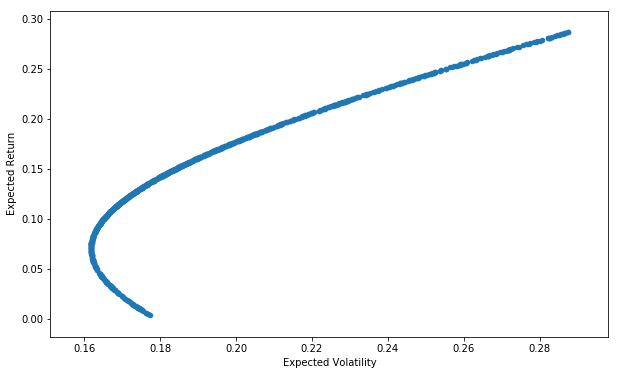

In [11]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [12]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [13]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,72.254228,54.709999,39.112259
2014-01-03,72.016156,54.560001,39.022589
2014-01-06,71.613266,57.200001,39.128563
2014-01-07,71.833021,57.919998,39.576910
2014-01-08,71.265320,58.230000,39.723643


In [14]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [15]:
num_assets = len(assets)
num_assets

3

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.23326567,  0.76156451,  0.00516983])

In [17]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [18]:
np.sum(weights * log_returns.mean()) * 250

0.2193653224942498

Expected Portfolio Variance:

In [19]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.053062699039245736

Expected Portfolio Volatility:

In [20]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.23035342202634138

*****

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.08390155,  0.09771026,  0.08159885,  0.13356891,  0.15938601,
         0.04244245, -0.01142913,  0.09993618,  0.09913962,  0.04587794,
         0.01903325,  0.07631141, -0.01081262, -0.00672752,  0.01901643,
         0.13383508,  0.04964453,  0.0303108 ,  0.09985471,  0.15423854,
         0.13313519,  0.05742658,  0.07144604,  0.11525468,  0.12374892,
         0.07458489,  0.09985273, -0.01816468,  0.03284373,  0.10999639,
         0.08772636,  0.1952487 ,  0.00906768,  0.02310631,  0.13415663,
         0.08489395,  0.1010062 ,  0.22058346,  0.01334209,  0.10489745,
         0.08834464,  0.11534229,  0.07155513,  0.09024282,  0.0403311 ,
         0.0956964 ,  0.17419531,  0.02253848,  0.00781126,  0.11549633,
         0.12510665,  0.06350782,  0.16479933,  0.11176433,  0.06003903,
         0.0890827 ,  0.0683139 ,  0.06003289,  0.02369723,  0.06743235,
         0.11294162,  0.13814429,  0.02760591,  0.07650292,  0.11597322,
         0.07274659,  0.08022738,  0.10144956,  0.0

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

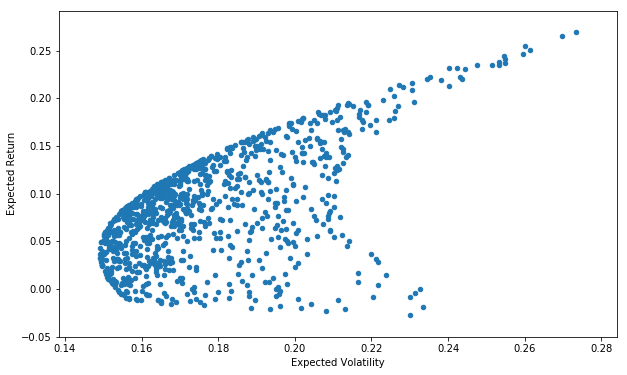

In [23]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')